In [1]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

Загрузка файла

In [2]:
data = pd.read_csv('auto.csv')

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Рассчет основных статистик для переменных(среднее, медиана, мин/макс, сред. отклонение)

In [4]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Расчет моды

In [5]:
for col in data.columns.tolist():
    try:
        print(col, ':', statistics.mode(data[col]))
    except:
        print(col, 'has two or more modes')

symboling : 0
normalized-losses : 161
make : toyota
fuel-type : gas
aspiration : std
num-of-doors : four
body-style : sedan
drive-wheels : fwd
engine-location : front
wheel-base : 94.5
length : 157.3
width : 63.8
height : 50.8
curb-weight : 2385
engine-type : ohc
num-of-cylinders : four
engine-size has two or more modes
fuel-system : mpfi
bore : 3.62
stroke : 3.4
compression-ratio : 9.0
horsepower : 68
peak-rpm : 5500
city-mpg : 31
highway-mpg : 25
price : 6785


Рассчет и визуализация корреляционной матрицы для переменных

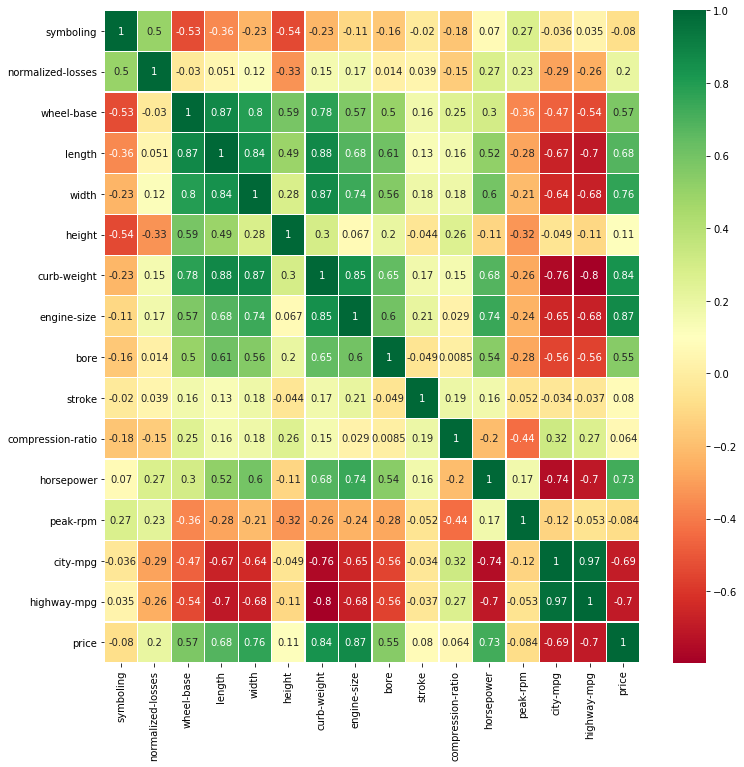

In [6]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2) 
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Визуализация распределения переменной 'price'

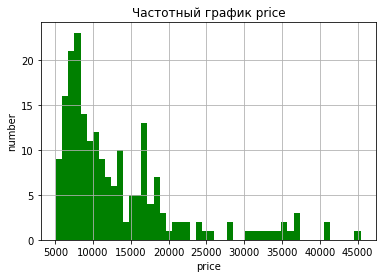

In [7]:
n, bins, patches = plt.hist(data['price'], 50, facecolor='g')

plt.xlabel('price')
plt.ylabel('number')
plt.title('Частотный график price')
plt.grid(True)
plt.show()

Коэффициент ассиметрии:

In [8]:
scipy.stats.skew(data['price'])

1.7534486514523662

Коэффициент эксцесса:

In [9]:
scipy.stats.kurtosis(data['price'])

2.848082544390688

Визуализация нескольких взаимосвязей между переменными

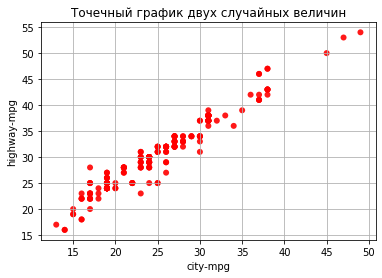

In [10]:
city = data['city-mpg']
highway = data['highway-mpg']
fig, ax = plt.subplots()
ax.scatter(city, highway, c = 'red', alpha = 0.9, edgecolors = 'none')

ax.grid(True)
plt.xlabel('city-mpg')
plt.ylabel('highway-mpg')
plt.title('Точечный график двух случайных величин')
plt.show()

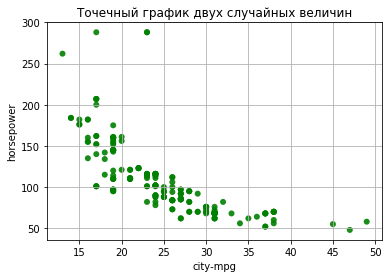

In [11]:
city = data['city-mpg']
horsepower = data['horsepower']
fig, ax = plt.subplots()
ax.scatter(city, horsepower, c = 'green', alpha = 0.9, edgecolors = 'none')

ax.grid(True)
plt.xlabel('city-mpg')
plt.ylabel('horsepower')
plt.title('Точечный график двух случайных величин')
plt.show()

In [12]:
cyl2 = data[data['num-of-cylinders'] == 'two']['horsepower']
cyl3 = data[data['num-of-cylinders'] == 'three']['horsepower']
cyl4 = data[data['num-of-cylinders'] == 'four']['horsepower']
cyl5 = data[data['num-of-cylinders'] == 'five']['horsepower']
cyl6 = data[data['num-of-cylinders'] == 'six']['horsepower']
cyl8 = data[data['num-of-cylinders'] == 'eight']['horsepower']
cyl12 = data[data['num-of-cylinders'] == 'twelve']['horsepower']

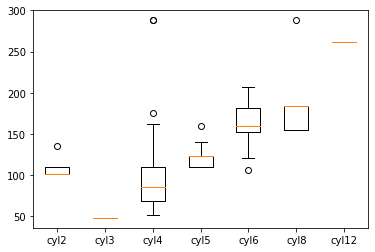

In [13]:
plt.boxplot((cyl2, cyl3, cyl4, cyl5, cyl6, cyl8, cyl12), 
            notch = False, sym = 'o', 
            labels = ['cyl2', 'cyl3', 'cyl4', 'cyl5', 'cyl6', 'cyl8', 'cyl12'])
plt.show()

Несколько гипотез

Гипотеза 1: средняя мощность автомобилей с 4 цилиндрами меньше можности автомобилей с 8 цилиндрами.

In [14]:
stats.ttest_ind(cyl4, cyl8)

Ttest_indResult(statistic=-6.386152820389662, pvalue=1.721887186617659e-09)

In [15]:
cyl4.mean()

93.0377358490566

In [16]:
cyl8.mean()

193.2

Проверяется гипотеза о равенстве средних значений. Так как p-value мало, то нулевая гипотеза отвергается в пользу альтернативной гипотезы.  
Следовательно, сущетсвуют статистически значимые различия в мощности с 4 и 8 цилиндрами.

Гипотеза 2: автомобили с задним расположением двигателя более мощные, чем автомобили с передним расположением.

In [17]:
front = data[data['engine-location'] == 'front']['horsepower']
rear = data[data['engine-location'] == 'rear']['horsepower']

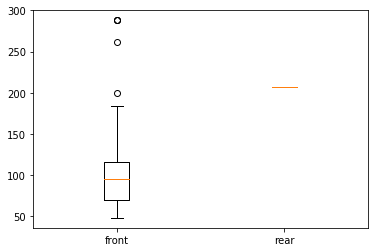

In [18]:
plt.boxplot((front, rear), 
            notch = False, sym = 'o', 
            labels = ['front', 'rear'])
plt.show()

In [19]:
stats.ttest_ind(front, rear)

Ttest_indResult(statistic=-4.215521611588134, pvalue=3.75021561952196e-05)

Проверяется гипотеза о равенстве средних значений. Так как p-value мало, то нулевая гипотеза отвергается в пользу альтернативной гипотезы.   
Автомобили с задним рсположением двигателя в выборке представлены только одним производителем (Porsche).

Гипотеза 3: автомобили производства Renault дешевле, чем автомобили производства Nissan.

In [20]:
renault = data[data['make'] == 'renault']['price']
nissan = data[data['make'] == 'nissan']['price']

In [21]:
stats.ttest_ind(renault, nissan)

Ttest_indResult(statistic=-0.2529733930044536, pvalue=0.8031552894671456)

In [22]:
renault.mean()

9595.0

In [23]:
nissan.mean()

10415.666666666666

Проверяется гипотеза о равенстве средних значений. Так как p-value велико, то нулевая гипотеза не может быть отвергнута.  
Следовательно, средняя цена автомобилей Renault и Nissan статистически значимо не различаются.

Гипотеза 4: универсалы чаще имеют полный привод, чем седаны.

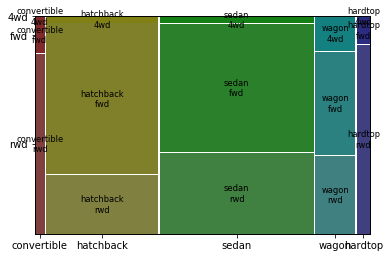

In [24]:
mosaic_diag = mosaic(data, ['body-style','drive-wheels'])

In [30]:
data_2 = data[(data['body-style'] == 'sedan') | (data['body-style'] == 'wagon')]

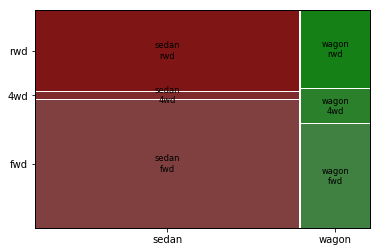

In [31]:
mosaic_diag = mosaic(data_2, ['body-style','drive-wheels'])

По мозаичной диаграмме видно, что в автомобилях с кузовом универсал полный привод встречается чаще. Требуется дополнительная проверка с помощью критерия хи-квадрат.